In [1]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1 - Analiza obrazów

Tekst:

![](galia.png "Galia")

Wzorzec:

![](galia_e.png "E")

In [2]:
text = iio.imread("galia.png")
text_pattern = iio.imread("galia_e.png")

FileNotFoundError: No such file: 'c:\Users\franc\Documents\Mowint\lab10\galia.png'

In [ ]:
def gray_and_flip(image: np.ndarray):
    shape = image.shape
    grey = np.zeros((shape[0], shape[1]))
    for i in range(shape[0]):
        for j in range(shape[1]):
            grey[i, j] = 255 - (0.3*image[i, j, 0] + 0.59*image[i, j, 1] + 0.11*image[i, j, 2])
    return grey

In [ ]:
text_gray = gray_and_flip(text)
text_pattern_gray = gray_and_flip(text_pattern)

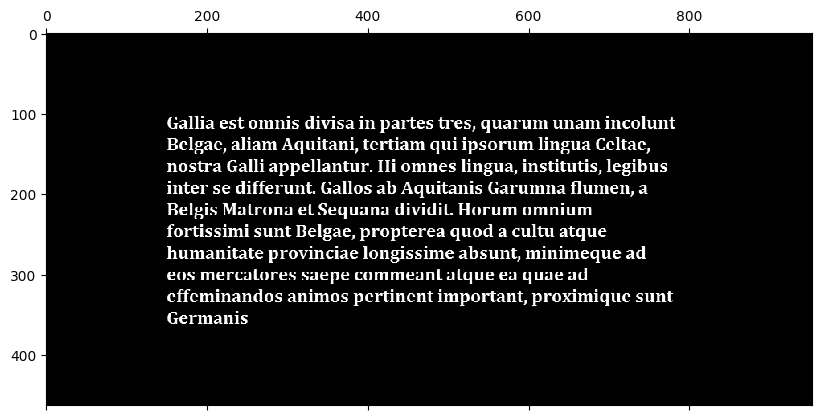

In [ ]:
plt.matshow(text_gray, 1, cmap="gist_gray")
plt.show()

In [ ]:
def calculate_correlation(image: np.ndarray, pattern: np.ndarray):
    return np.real(
        np.fft.ifft2(
            np.multiply(
                np.fft.fft2(image),
                np.fft.fft2(
                    np.rot90(pattern, 2),
                    image.shape
                ))
            )
    )

In [ ]:
correlation  = calculate_correlation(text_gray, text_pattern_gray)

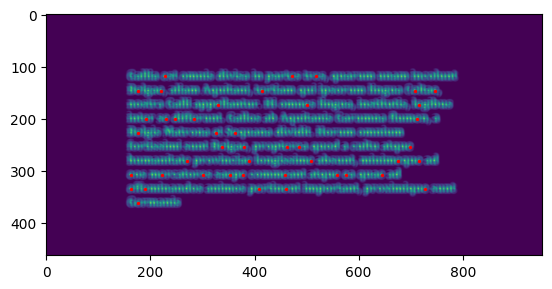

In [ ]:
plt.imshow(correlation)
l = []
for i in range(correlation.shape[0]):
    for j in range(correlation.shape[1]):
        l.append((correlation[i, j], (i, j)))
l.sort(reverse=True)
top = l[:int(len(l)*0.0001)]
X = [t[1][0] for t in top]
Y = [t[1][1] for t in top]
plt.scatter(Y, X, c="r", s=2)
plt.show()

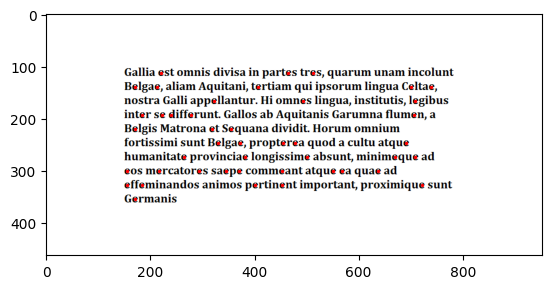

In [ ]:
plt.imshow(text)
X = [t[1][0]-7 for t in top]
Y = [t[1][1]-7 for t in top]
plt.scatter(Y, X, c="r", s=2)
plt.show()

In [ ]:
fish = iio.imread("school.jpg")
fish_pattern = iio.imread("fish1.png")

In [ ]:
def gray(image: np.ndarray):
    shape = image.shape
    grey = np.zeros((shape[0], shape[1]))
    for i in range(shape[0]):
        for j in range(shape[1]):
            grey[i, j] = (0.3*image[i, j, 0] + 0.59*image[i, j, 1] + 0.11*image[i, j, 2])
    return grey

In [ ]:
fish = gray(fish)
fish_pattern = gray(fish_pattern)

In [ ]:
fish_c = calculate_correlation(fish, fish_pattern)

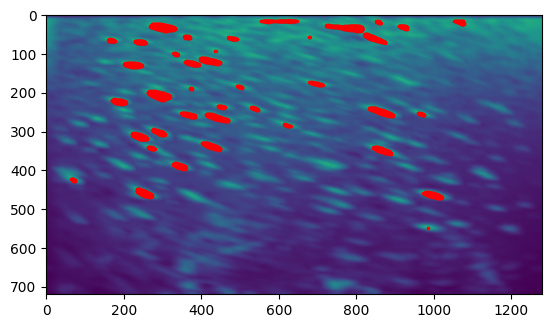

In [ ]:
plt.imshow(fish_c)
l = []
for i in range(fish_c.shape[0]):
    for j in range(fish_c.shape[1]):
        l.append((fish_c[i, j], (i, j)))
l.sort(reverse=True)
top = l[:int(len(l)*0.01)]
X = [t[1][0] for t in top]
Y = [t[1][1] for t in top]
plt.scatter(Y, X, c="r", s=2)
plt.show()